# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This analysis uses a movie database that includes movie data about genre, commercial success, amount of votes and average voting score for movies. The dataset opens the door for many questions to be answered: How can a profitable movie be defined, is there a pattern? What are the most popular movie types? What were the most unprofitable movies of all time?
However the dataset is going to be wrangled before defining a distinct research question.


<a id='wrangling'></a>
## Data Wrangling


### General Properties

First the dataframe and packages are imported

In [1]:
#to import the relevant modules and the dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("tmdb-movies.csv")
df.shape

(10866, 21)

The following cells are to get a high level overview over the data and be able to predict the relevant tasks to be executed for the data wrangling part.

In [2]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To ensure no spaces before or between the headers words

In [3]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"),inplace=True)

To check on the headers

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.shape

(10866, 21)

Text(0.5, 0, 'revenue in billion')

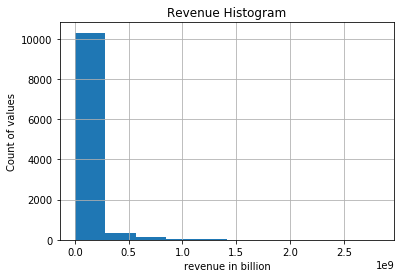

In [88]:
df["revenue_adj"].hist()
plt.title("Revenue Histogram")
plt.ylabel("Count of values")
plt.xlabel("revenue in billion")

In [7]:
df.query("revenue==0 or budget==0").shape

(7011, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

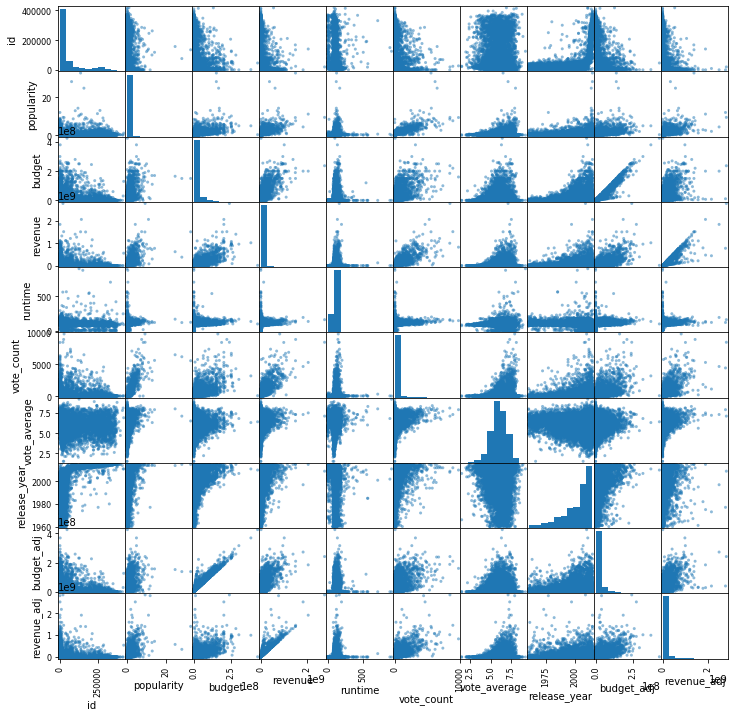

In [9]:
pd.plotting.scatter_matrix(df, figsize=[12,12]);

### Data Cleaning of the Movie database

#### Following steps will be executed:
1. Non used data will be dropped from the dataset (homepage","keywords","overview","imdb_id","budget",
   "revenue","director","cast","tagline","release_date")
2. Null objects of genres will be removed after checking on high level whether the null values follow 
   the characteristics of the dataset.
3. the genre tab will be adjusted to only show the main genre which is expected to be the first in the group
4. the Production column will be dropped due to siginificant amount of nullvalues
5. In order to use the profitability statement all zero values in Budget or Revenue are to be dropped (only for relevant research question the diminished dataframe is to be used)


1. Drop Columns which won't be used due to focus of the data analysis task and the insights that the data provides.

In [10]:
# to drop data which is not to be used
df.drop(["homepage","keywords","overview","imdb_id","budget",
         "revenue","director","cast","tagline","release_date"],
        axis=1, inplace=True)

2. Check whether the Genre null values are significantly different from the remaining dataset. If not to be released.

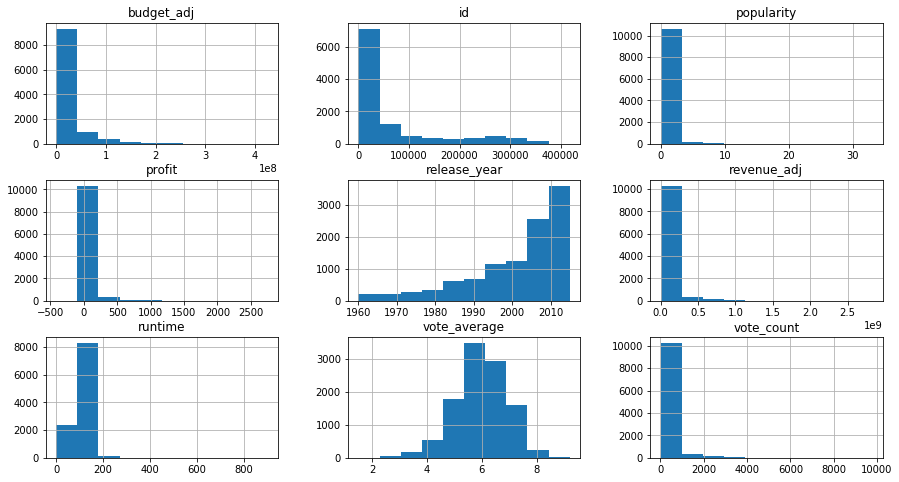

In [80]:
#check whether null values in genre are significantly different from dataset.
df.hist(figsize=[15,8]);

This is now to be compared to the histogram overview of the null values for genre

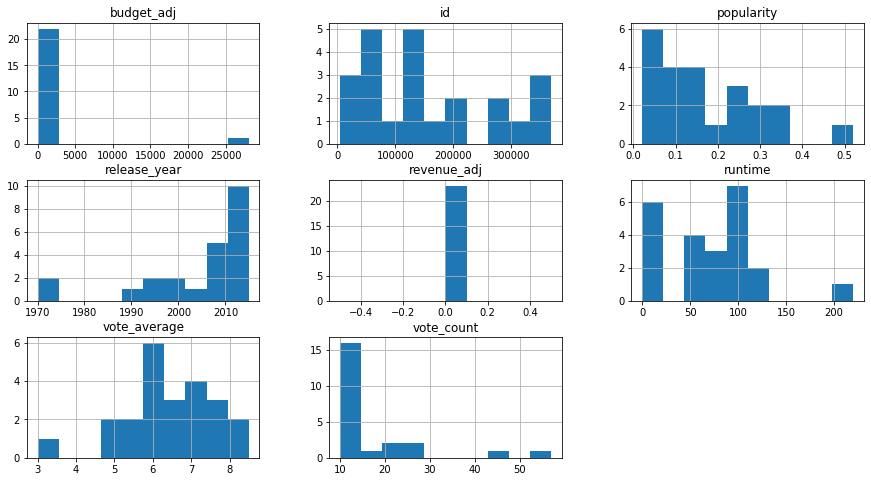

In [12]:
#check whether null values in genre are significantly different from dataset. 
df[df.genres.isnull()].hist(figsize=[15,8]);

Generally the null data value sample of the Genre follows the distribution of the dataset. There it is going to be dropped

In [13]:
df.dropna(axis=0, inplace=True, subset=["genres"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
id                      10843 non-null int64
popularity              10843 non-null float64
original_title          10843 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj              10843 non-null float64
revenue_adj             10843 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1016.5+ KB


3. Inserting main Genre column with the first written word from the Genre Column

In [15]:
df.info()
for n in df["genres"]:
    df["main_genre"]=df["genres"].apply(lambda x: x.split("|")[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
id                      10843 non-null int64
popularity              10843 non-null float64
original_title          10843 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj              10843 non-null float64
revenue_adj             10843 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1016.5+ KB


In [16]:
df.drop(["genres"],axis=1,inplace=True)

4. production company column is left out of analysis due to non- completeness. 

In [17]:
df.drop(["production_companies"], axis=1, inplace=True)

5. create dataset that does not contain zero values for profit or revenue. Used source https://www.ritchieng.com/pandas-multi-criteria-filtering/ for help

In [55]:
df_adj_prft=df[(df.budget_adj>0)&(df.revenue_adj>0)]

In [57]:
df_adj_prft.shape

(3855, 12)

<a id='eda'></a>
## Exploratory Data Analysis


### Is there a correlation between the amount of votes a movie receives and its profit. Further,  what is the profit per vote

This question builts on the adjusted profit of the movie (Revenue - Budget) and tries to quantify the value of a vote (independent of the ranking). 

Inserting a profit column in million USD

In [61]:
#profit in millions
df_adj_prft["profit"]=(df_adj_prft["revenue_adj"]-df_adj_prft["budget_adj"])/1000000

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Check via a scatterchart whether a correlation exists - positive correlation is existant

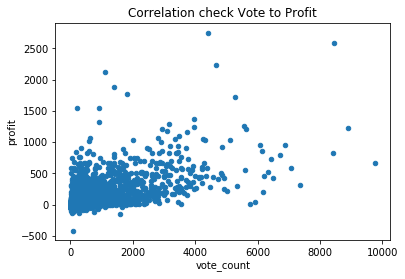

In [69]:
df_adj_prft.plot(x="vote_count",y="profit",kind="scatter")
plt.title("Correlation check Vote to Profit");

The Scatter chart indicates correlation. This is to be checked with corr. function

In [73]:
df_adj_prft.corr()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,1.000000,0.188871,-0.035693,0.111462,-0.001281,0.489895,-0.124036,-0.088288,-0.069677
popularity,0.188871,1.000000,0.215157,0.780106,0.317924,0.173179,0.399375,0.546985,0.516896
runtime,-0.035693,0.215157,1.000000,0.273842,0.351909,-0.112607,0.334011,0.280604,0.235355
vote_count,0.111462,0.780106,0.273842,1.000000,0.387271,0.207073,0.497988,0.654713,0.614090
vote_average,-0.001281,0.317924,0.351909,0.387271,1.000000,-0.134493,0.036913,0.266996,0.288795
release_year,0.489895,0.173179,-0.112607,0.207073,-0.134493,1.000000,0.075032,-0.103260,-0.132311
budget_adj,-0.124036,0.399375,0.334011,0.497988,0.036913,0.075032,1.000000,0.570466,0.404370
revenue_adj,-0.088288,0.546985,0.280604,0.654713,0.266996,-0.103260,0.570466,1.000000,0.981856
profit,-0.069677,0.516896,0.235355,0.614090,0.288795,-0.132311,0.404370,0.981856,1.000000


Correlation of 0,61 indicates a moderate positive correlation

In [64]:
df_adj_prft["vote_count"].describe()

count    3855.000000
mean      527.611933
std       879.868374
min        10.000000
25%        71.000000
50%       204.000000
75%       580.000000
max      9767.000000
Name: vote_count, dtype: float64

Making cluster groups of the amount of votes that were given 

In [22]:
bin=[0,100,500,5000,10000]
bin_labels=["<100","<500", "<5000",">5000"]

Integrate new column with the vote cluster

In [81]:
df_adj_prft["vote_cluster"]= pd.cut(df["vote_count"],bin, labels= bin_labels)

C:\Users\jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_adj_prft.head(200)

,id,popularity,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,profit,vote_cluster
0,135397,32.985763,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,1254.445953,>5000
1490,22832,0.796761,Ninja Assassin,99,218,6.1,2009,4.065602e+07,6.145396e+07,Action,20.797938,<500
1484,17134,0.826039,12 Rounds,108,130,5.9,2009,2.032801e+07,1.756373e+07,Action,-2.764278,<500
1478,22787,0.850476,Whiteout,101,114,5.2,2009,4.065602e+07,1.240621e+07,Action,-28.249805,<500
1471,13455,0.907448,Push,111,367,5.8,2009,3.862322e+07,4.621095e+07,Action,7.587733,<500
5903,146227,0.367908,Getaway,90,174,5.0,2013,1.684860e+07,9.830164e+06,Action,-7.018436,<500
5908,190754,0.171647,On the Job,120,23,5.9,2013,9.854119e+05,4.362739e+05,Action,-0.549138,<100
1456,16995,1.043738,State of Play,127,257,6.6,2009,6.098403e+07,8.922389e+07,Action,28.239867,<500
5576,93828,0.794369,Welcome to the Punch,99,198,5.5,2013,7.956283e+06,9.123517e+03,Action,-7.947160,<500
5588,76170,0.734349,The Wolverine,126,2986,6.4,2013,1.123240e+08,3.888663e+08,Action,276.542324,<5000


Preparing query for the plt table

In [83]:
vote_loss=df_adj_prft.query("vote_cluster== '<100'")["profit"].mean()
vote_low=df_adj_prft.query("vote_cluster== '<500'")["profit"].mean()
vote_high=df_adj_prft.query("vote_cluster== '<5000'")["profit"].mean()
vote_highest=df_adj_prft.query("vote_cluster== '>5000'")["profit"].mean()
vote_all=[vote_loss,vote_low,vote_high,vote_highest]

Displaying table - a very significant increase in average profit is seen compared to the amount of votes

Text(0, 0.5, 'Profit')

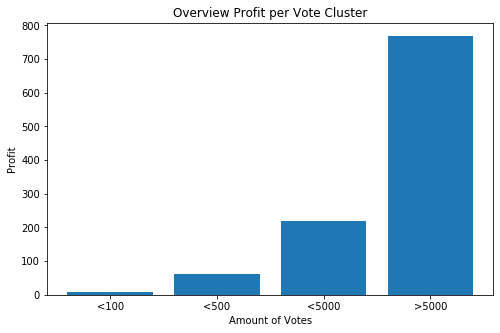

In [85]:
plt.subplots(figsize=(8, 5))
plt.bar(bin_labels,vote_all,)
plt.title("Overview Profit per Vote Cluster")
plt.xlabel("Amount of Votes")
plt.ylabel("Profit")

Average Profit per vote calculation- amounting to 155kUSD per vote

In [86]:
#profit per vote
df_adj_prft["profit"].sum()/df_adj_prft["vote_count"].sum()

0.17587374583460533

### What movie genres are receiving the highest average votings


Get a grouped overview over the different genres in total 

In [28]:
df.groupby("main_genre")["vote_average"].mean()
df.sort_values(by="main_genre",inplace=True)

the graph shows the best votings for movies, the best votings are received for documentary films

Text(0, 0.5, 'Average Voting')

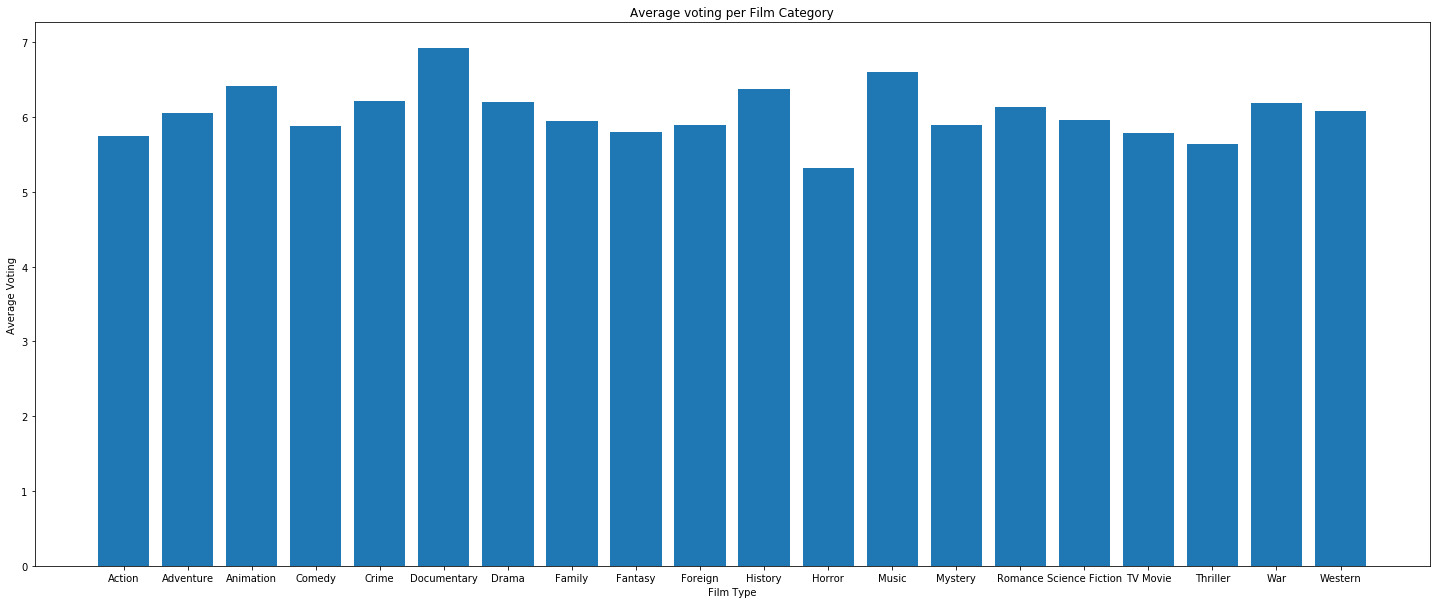

In [29]:
# use unstack()
plt.subplots(figsize=(25, 10))
plt.bar(df["main_genre"].unique(),df.groupby("main_genre")["vote_average"].mean())
plt.title("Average voting per Film Category")
plt.xlabel("Film Type")
plt.ylabel("Average Voting")

In [30]:
df.groupby("main_genre")["profit"].mean()

main_genre
Action              44.535672
Adventure          118.237624
Animation           53.755051
Comedy              25.913045
Crime               30.313280
Documentary          1.674048
Drama               22.771116
Family              56.644316
Fantasy             55.543701
Foreign              0.000000
History             42.181053
Horror              17.102749
Music               24.150712
Mystery             17.594661
Romance             34.348104
Science Fiction     69.527072
TV Movie             0.447992
Thriller            17.297821
War                 23.179445
Western             21.036811
Name: profit, dtype: float64

Text(0, 0.5, 'Average Voting')

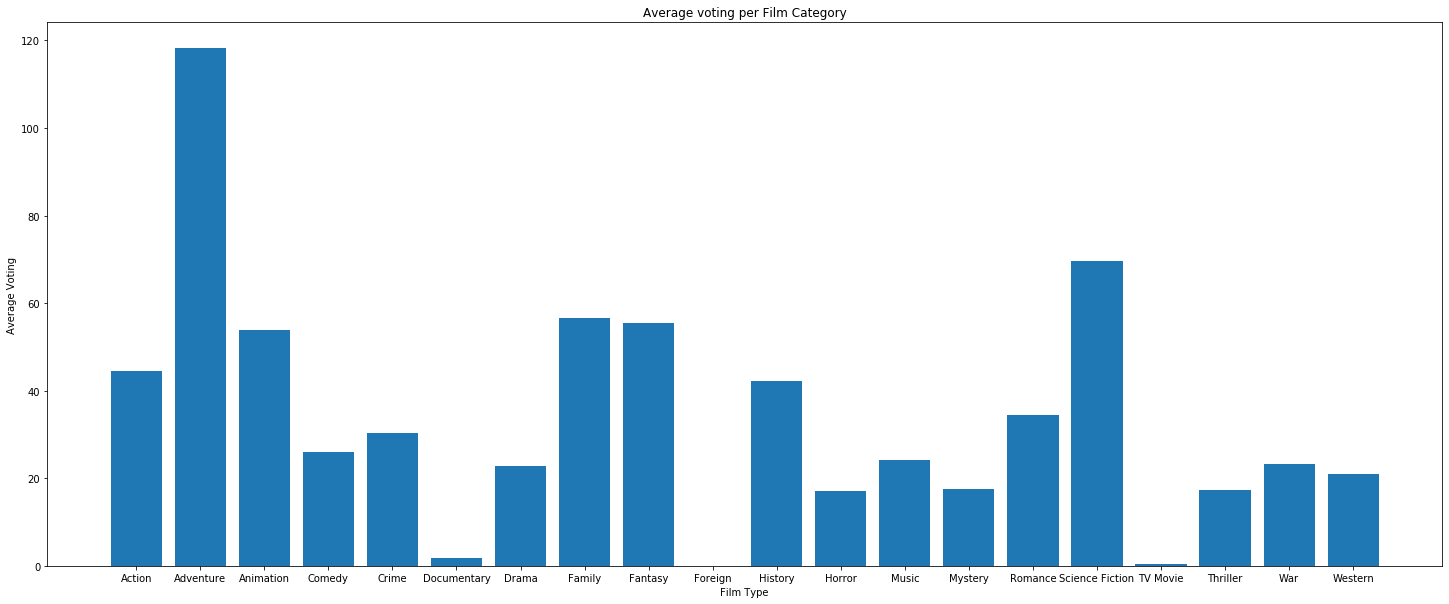

In [31]:
# use unstack()
plt.subplots(figsize=(25, 10))
plt.bar(df["main_genre"].unique(),df.groupby("main_genre")["profit"].mean())
plt.title("Average voting per Film Category")
plt.xlabel("Film Type")
plt.ylabel("Average Voting")

<a id='conclusions'></a>
## Conclusions


During the conducted data analysis, the data set was wrangeled, cleaned and then analysed for the two research questions:
1. Is there a correlation between the amount of votes a movie receives and its profit. Further,  what is the profit per vote
2. What movie genres are receiving the highest votings

Results
1. From the derived Graph a positive correlation exists between the amount of votes on the open portal IMDB and the profitability. The more votes a movie gets the higher is the average profit of the movie. The cause effect relation is most likely due to higher attantion to good movies, receiving more votings on the website. The analysis calculates further the profit per vote which amounts to ~176 kUSD per vote. This shows the limited usability of this study. E.g. if the profit would be mainly depending on the votes, movie firms would write their own comments in order to maximize profit. In general the amoung of votings can be seen as a indicator for a good movie, but not as a single success factor for movies (e.g. Profit most likely relates to other factors as well).
2. In general only Documentary movies receive an average rating beyond 6.9. Conclusively the value of having good ratings has not been compared to the profitability of the movies, but comparing the highest average voting segment (documentary) with its Profit compared to others, it is marginally small (1mUSD vs. 120 mUSD for Adventure movies on average). This might be due to other limitations of the analysis. E.g. it might be that the audience of documentary movies has usually a higher willingness to give good votes. 

Further Limitations: Although the conducted analysis gives insights into the movies, there is limitations coming with the created report:

    1: Data source: The Data source and Data Quality has not been double checked, but assumed reliable as fetched from a trustworthy source. However certain values for e.g. Genre or producer were not filled.
    2: Clustering: The clustering of the genres was not a one to one relationship. Due to avoidance of double counting of movies only the first named movie type was used. 
